# Wordcloud of A Course in Miracles Text

Inspired by the lab on wordclouds from IBM's data-vizualisation with python, I want to create a word cloud of the text of A Course in Miracles. This is meant as a little gift for my dear friend Britney Shawles. Feel free to follow her: <br>[Whole and Healthy Kitchen](https://www.wholeandhealthykitchen.com/about-britney/) <br> [Youtube-Channel](https://www.youtube.com/channel/UC9gtnMEmJqFr3LgcKcRVEyw) <br> [Miracles of Mind](http://miraclesofmind.weebly.com) <br> [Makeshyft R.D.A.](https://www.makeshyft.com/)

You can find the [Coursera Course](https://www.coursera.org/learn/python-for-data-visualization) mentioned  <br>

The library we use is called [wordcloud](https://github.com/amueller/word_cloud/). It was created by <b>Andreas Mueller</b>.

In [7]:
#We import two packages from the wordcloud library: wordcloud itself and STOPWORDS - a list containing many of irrelevant words as far as content is concerned like 'the'.
from wordcloud import WordCloud, STOPWORDS
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image # converting images into arrays
import wget

#### Preparing the data
We need a .txt-file to work with wordcloud. Since the text of ACIM is in the public domain, I downloaded the ACIM-Text from [wikimedia](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiV37Pq2JvtAhU3D2MBHeoUDxwQFjABegQIBRAC&url=https%3A%2F%2Fcommons.wikimedia.org%2Fwiki%2FFile%3AA_Course_in_Miracles_Text.pdf&usg=AOvVaw2lWs2oRulbswhRPQc_H3b4). However this is a pdf-file. So I used a converter to make a .txt-file out of it.<br>
We also want to delete all numbers from the text.

In [8]:
#import ACIM_Text.txt from the working directory.
#input file
diget=['0', '1', '2', '3', '4', '5', '6','7', '8', '9']
for i in range(0,9):
   #read input file
    fin = open("ACIM.txt", "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace(diget[i], '')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open("ACIM.txt", "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()



#### Creating the Word Cloud

In [9]:
#we use the stopwords from the package. We can later add words to the list, once we created the wordcloud.
stopwords = set(STOPWORDS)

In [10]:
# instantiate a word cloud object
ACIM = open('ACIM.txt', 'r').read()
ACIM_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
ACIM_wc.generate(ACIM)

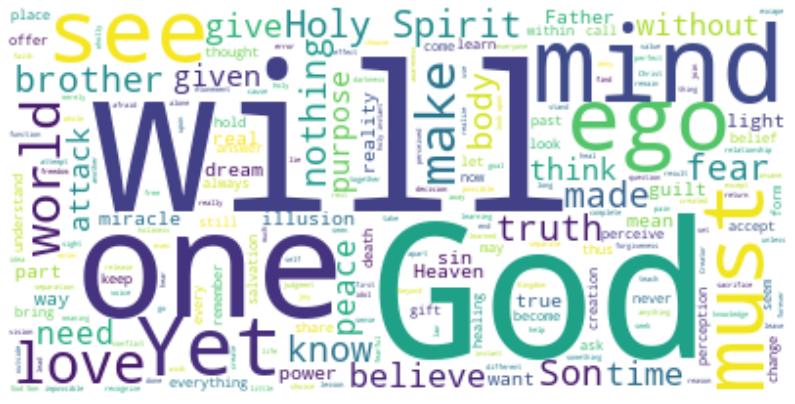

In [11]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(ACIM_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us use an image as a background. I download a Jesus-shaped silhoutte from [here](https://i.pinimg.com/originals/34/a6/bb/34a6bb4a270c78d244217d460c3ddcfb.png)

In [12]:
# download image
print('Beginning file download with wget module')
url = 'https://i.pinimg.com/originals/34/a6/bb/34a6bb4a270c78d244217d460c3ddcfb.png'
wget.download(url, 'Jesus.png')
   
# save mask to Jesus_mask
Jesus_mask = np.array(Image.open('Jesus.png'))
    


Beginning file download with wget module
100% [..............................................................................] 99241 / 99241

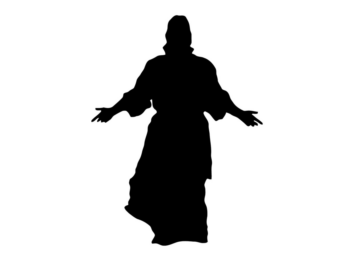

In [13]:
#This is our mask
Jesus_mask = np.array(Image.open('Jesus (1).png'))
fig = plt.figure()
fig.set_figwidth(6) # set width
fig.set_figheight(15) # set height

plt.imshow(Jesus_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Let's shape the wordcloud according to our image

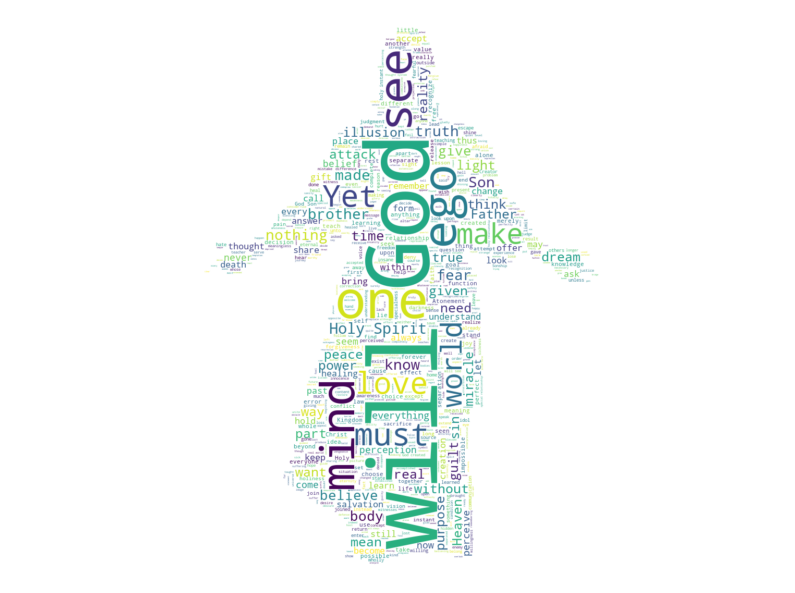

In [14]:
# instantiate a word cloud object
ACIM_wc = WordCloud(background_color='white', max_words=2000, mask=Jesus_mask, stopwords=stopwords)

# generate the word cloud
ACIM_wc.generate(ACIM)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(ACIM_wc, interpolation='bilinear')
plt.axis('off')
ACIM_wc.to_file('ACIM.png')

Very pretty. We want to remove a few words. 'yet', 'within' 'without', 'may',  'must', 'let'

In [15]:
addStopwords=['yet', 'within' 'without', 'may', 'must', 'let']
for i in range (len(addStopwords)):
                stopwords.add(addStopwords[i]) # add the words said to stopwords

Let's create a new wordcloud of the whole ACIM

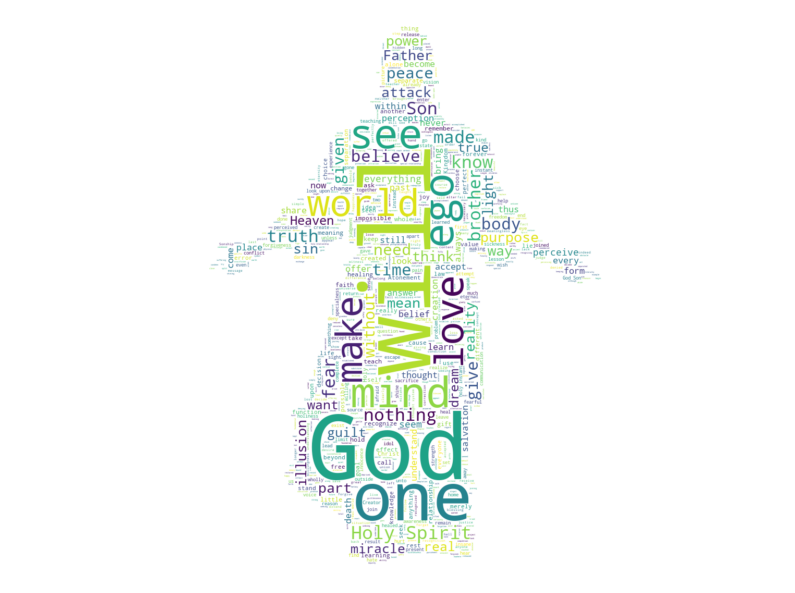

In [34]:
# instantiate a word cloud object
ACIM_wc = WordCloud(background_color='white', max_words=999992000, mask=Jesus_mask, stopwords=stopwords)

# generate the word cloud
ACIM_wc.generate(ACIM)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(ACIM_wc, interpolation='bilinear')
plt.axis('off')
ACIM_wc.to_file('ACIM.png')